# Title Stuff
## Joseph Lim

Description

## Loading and Cleaning Data

In [64]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv"

In [18]:
df = pd.read_csv(url)
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


In [34]:
filter_0 = df["SizeRank"] >=0
filter_3 = df["SizeRank"] <= 3 

top4_df = df[filter_0 & filter_3]
top4_df["SizeRank"].value_counts()

0    1
1    1
2    1
3    1
Name: SizeRank, dtype: int64

In [30]:
top4_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [36]:
#Melting wide form into long form
top4_df = pd.melt(top4_df.drop(columns = ["RegionID", "SizeRank", "RegionType", "StateName",
                                         "State", "Metro", "CountyName"]), id_vars=["RegionName"],
                  value_name="Value",var_name="Date")
top4_df

,RegionName,Date,Value
0,New York,2000-01-31,253690.0
1,Los Angeles,2000-01-31,234181.0
2,Houston,2000-01-31,109068.0
3,Chicago,2000-01-31,166139.0
4,New York,2000-02-29,255517.0
...,...,...,...
1087,Chicago,2022-08-31,315587.0
1088,New York,2022-09-30,781622.0
1089,Los Angeles,2022-09-30,966595.0
1090,Houston,2022-09-30,272639.0


In [37]:
top4_df["Date"] = pd.to_datetime(top4_df["Date"])

In [38]:
#Setting date as index
top4_df = top4_df.set_index("Date")
top4_df.head()

,RegionName,Value
Date,,
2000-01-31,New York,253690.0
2000-01-31,Los Angeles,234181.0
2000-01-31,Houston,109068.0
2000-01-31,Chicago,166139.0
2000-02-29,New York,255517.0


In [39]:
top4_df = top4_df.groupby("RegionName").resample("MS").sum()
top4_df

/var/folders/z_/c_drbxf10fbfpphcpb2wk3mm0000gn/T/ipykernel_4668/538549816.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top4_df = top4_df.groupby("RegionName").resample("MS").sum()


Value
RegionName Date                
Chicago    2000-01-01  166139.0
           2000-02-01  166536.0
           2000-03-01  167368.0
           2000-04-01  168826.0
           2000-05-01  170499.0
...                         ...
New York   2022-05-01  768797.0
           2022-06-01  773944.0
           2022-07-01  777692.0
           2022-08-01  779960.0
           2022-09-01  781622.0

[1092 rows x 1 columns]

## Visualizations

In [40]:
unstacked = top4_df.unstack(level=0)
unstacked

Value                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2000-01-01  166139.0  109068.0    234181.0  253690.0
2000-02-01  166536.0  109079.0    234401.0  255517.0
2000-03-01  167368.0  108878.0    235513.0  257207.0
2000-04-01  168826.0  108881.0    237589.0  260310.0
2000-05-01  170499.0  108834.0    240113.0  263204.0
...              ...       ...         ...       ...
2022-05-01  312487.0  265558.0    990391.0  768797.0
2022-06-01  314663.0  268901.0    992337.0  773944.0
2022-07-01  315910.0  271059.0    992630.0  777692.0
2022-08-01  315587.0  272400.0    978196.0  779960.0
2022-09-01  315429.0  272639.0    966595.0  781622.0

[273 rows x 4 columns]

In [42]:
unstacked.columns

MultiIndex([('Value',     'Chicago'),
            ('Value',     'Houston'),
            ('Value', 'Los Angeles'),
            ('Value',    'New York')],
           names=[None, 'RegionName'])

In [62]:
def thousands(x, pos):
    return '$%1.1fK' % (x*1e-3)

Text(0.5, 0, 'Year')

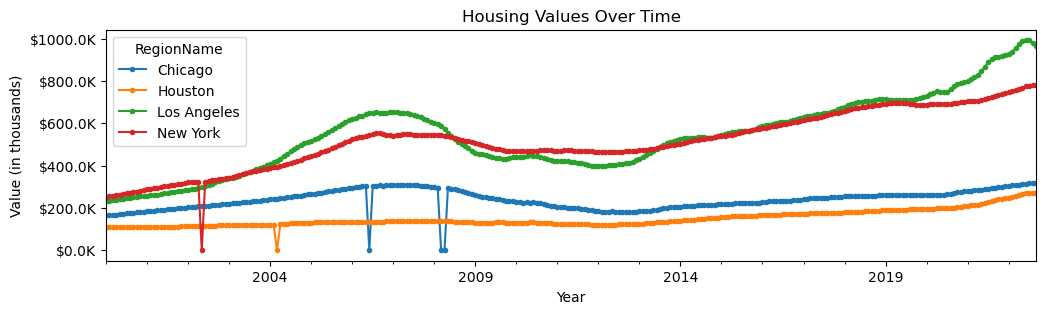

In [65]:
fig, ax = plt.subplots(figsize = (12,3))
ax = unstacked["Value"].plot(ax = ax, marker = ".")

ax.yaxis.set_major_formatter(FuncFormatter(thousands))

ax.set_title("Housing Values Over Time")
ax.set_ylabel("Value (in thousands)")
ax.set_xlabel("Year")

### Which City had the highest Typical Home Value at the end of 2008? Which had the least?

New York had the highest typical home value at the end of 2008, with a valuation of 510309 USD, while Houston had the lowest at 131283 USD

In [75]:
df_2008 = unstacked.copy()
df_2008["2008-12"]

/var/folders/z_/c_drbxf10fbfpphcpb2wk3mm0000gn/T/ipykernel_4668/116495331.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_2008["2008-12"]


Value                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2008-12-01  265306.0  131283.0    469294.0  510309.0

### How much did the home values change from November 2008 to December 2008 (in dollars)?

All values had a negative change. Chicago's values dropped by $5753, Houston's by $964, LA's by $12,611, and New York's by $4458.

In [79]:
df_diff = unstacked.copy()
df_diff = df_diff["2008"]
df_diff.diff()

/var/folders/z_/c_drbxf10fbfpphcpb2wk3mm0000gn/T/ipykernel_4668/3792305399.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_diff = df_diff["2008"]


Value                             
RegionName   Chicago Houston Los Angeles New York
Date                                             
2008-01-01       NaN     NaN         NaN      NaN
2008-02-01   -4144.0  -696.0     -6394.0   -440.0
2008-03-01 -296063.0  -717.0    -10570.0  -1536.0
2008-04-01       0.0  -167.0    -14839.0  -2697.0
2008-05-01  293467.0  -400.0    -16637.0  -4180.0
2008-06-01   -4972.0  -455.0    -14967.0  -3875.0
2008-07-01    -321.0  -381.0    -15402.0  -4599.0
2008-08-01   -4975.0  -622.0    -13700.0  -3921.0
2008-09-01   -2504.0  -838.0    -10396.0  -3943.0
2008-10-01   -5846.0  -743.0     -9145.0  -3299.0
2008-11-01   -3790.0  -942.0     -9074.0  -3281.0
2008-12-01   -5753.0  -964.0    -12611.0  -4458.0